Copyright 2020 Dale Bowman, Natasha A. Sahr, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# $K$-Nearest Neighbor Regression

Unlike clustering, where the goal is to uncover latent patterns, and classification, where the goal is to predict a class label, $K$-nearest neighbor (KNN) regression is a technique that is used to predict a numeric value.
KNN regression is a _non-parametric_ regression method and is simple to understand and implement.
Non-parametric methods are statistical models that do not assume the data come from a particular probability distribution.
Like the KNN classifier, KNN regression is based on the idea that observation vectors that are close to each other in space tend to be similar.

## What you will learn

In the sections that follow you will learn about KNN regression and how it can be used to model your data for prediction. 
We will study the following:

- KNN regression
- Choosing K

## When to use KNN regression

KNN regression is useful in situations that involve response variables that are not normally distributed and when the relationship between the predictors and response is not linear.

## How it works

KNN regression predicts the numeric value of a new datapoint as the *average distance* between the datapoint and its $K$ nearest neighbors.
We illustrate this using the data in the table below on home loans, age, and House Price Index (HPI).
The two numerical variables, `Age` and `Loan`, are used to predict the `HPI` and so they are called **predictors**. 
The `HPI` being predicted is called the **response** or **dependent variable**. 
We observe the data in the table, and using these predictors, we would like to predict the `HPI` for an individual 47 years old with home loan of $150,000.

In the table below, the `Distance` column is calculated as the Euclidean distance between each predictor datapoint and the values of age (47) and loan (150,000) that we want to predict the HPI for.
The formula looks like: 

$$Distance = \sqrt{(\text{Age}-47)^2 + (\text{Loan}-150000)^2}$$

<!-- <table>
<thead>
<tr class="header">
<th align="left">Age</th>
<th align="right">Loan</th>
<th align="right">HPI</th>
<th align="right">Distance</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">47</td>
<td align="right">150,745</td>
<td align="right"><font color="red">244</font></td>
<td align="right"> 745</td>
</tr>
<tr class="even">
<td align="left">34</td>
<td align="right">198,333</td>
<td align="right">269</td>
<td align="right">48,333</td>
</tr>
<tr class="odd">
<td align="left">42</td>
<td align="right">187,338</td>
<td align="right">154</td>
<td align="right">37,338</td>
</tr>
<tr class="even">
<td align="left">44</td>
<td align="right">139,505</td>
<td align="right">173</td>
<td align="right">10,495</td>
</tr>
<tr class="odd">
<td align="left">41</td>
<td align="right">142,113</td>
<td align="right">256</td>
<td align="right">7,887</td>
</tr>
<tr class="even">
<td align="left">44</td>
<td align="right">102,839</td>
<td align="right">274</td>
<td align="right">47,161</td>
</tr>
<tr class="odd">
<td align="left">32</td>
<td align="right">120,020</td>
<td align="right">191</td>
<td align="right">29,980</td>
</tr>
<tr class="even">
<td align="left">49</td>
<td align="right">191,772</td>
<td align="right">110</td>
<td align="right">41,772</td>
</tr>
<tr class="odd">
<td align="left">39</td>
<td align="right">142,664</td>
<td align="right"><font color="red"> 138</font></td>
<td align="right">7,336</td>
</tr>
<tr class="even">
<td align="left">45</td>
<td align="right">165,817</td>
<td align="right">238</td>
<td align="right">15,817</td>
</tr>
<tr class="odd">
<td align="left">34</td>
<td align="right">163,728</td>
<td align="right">140</td>
<td align="right">13,728</td>
</tr>
<tr class="even">
<td align="left">34</td>
<td align="right">143,132</td>
<td align="right"><font color="red"> 198</font></td>
<td align="right">6,868</td>
</tr>
</tbody>
</table>
 -->
<!--  Note: concerned about single table presentation implying distance was part of data, so split -->
<table>
    <tr><th>Training Data</th><th>Age=47 and Loan=150,000</th></tr>
   <tr><td>
       
| Age | Loan    | HPI |
|-----|---------|-----|
| **47**  | **150,745** | <font color="red"> **244**</font> |
| 34  | 198,333 | 269 |
| 42  | 187,338 | 154 |
| 44  | 139,505 | 173 |
| 41  | 142,113 | 256 |
| 44  | 102,839 | 274 |
| 32  | 120,020 | 191 |
| 49  | 191,772 | 110 |
| **39**  | **142,664** | <font color="red"> **138**</font> |
| 45  | 165,817 | 238 |
| 34  | 163,728 | 140 |
| **34**  | **143,132** | <font color="red"> **198**</font> |

</td><td>
    
| Distance |
|----------|
| **745**      |
| 48,333   |
| 37,338   |
| 10,495   |
| 7,887    |
| 47,161   |
| 29,980   |
| 41,772   |
| **7,336**    |
| 15,817   |
| 13,728   |
| **6,868**    |
    
</td></tr></table>

If we use $K=3$ then to predict the HPI for age = 47 and loan = 150,000 we average the HPI values for the 3 nearest neighbors.
These are the neighbors with the smallest distance as shown in red in the table.
The predicted HPI is found as 

$$HPI = \frac{244+198+138}{3} = 193.33$$

## Residuals

Typically the KNN regression is trained on a training set and the performance of the model is tested by comparing predicted values with the actual responses in the the testing set.
The table below shows the performance of the KNN regression model on 3 members of the test set.

<!-- <table>
<thead>
<tr class="header">
<th align="left"><span><strong>Age</strong></span></th>
<th align="left"><span><strong>Loan</strong></span></th>
<th align="left"><span><strong>HPI Observed</strong></span></th>
<th align="left"><span><strong>HPI Predicted</strong></span></th>
<th align="left"><span><strong>Residual</strong></span></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">44</td>
<td align="left">107,889</td>
<td align="left">133</td>
<td align="left">222</td>
<td align="left">-89</td>
</tr>
<tr class="even">
<td align="left">32</td>
<td align="left">127,052</td>
<td align="left">207</td>
<td align="left">188</td>
<td align="left">19</td>
</tr>
<tr class="odd">
<td align="left">35</td>
<td align="left">163,463</td>
<td align="left">242</td>
<td align="left">207</td>
<td align="left">35</td>
</tr>
</tbody>
</table> -->

<table>
<tr><th>Test Data</th><th>KNN Regression Results</th></tr>
<tr><td>
       
| Age | Loan   | HPI |
|-----|--------|-----|
| 44  | 107889 | 133 |
| 32  | 127052 | 207 |
| 35  | 163463 | 242 |

</td><td>

| HPI Predicted | Residual |
|---------------|----------|
| 222           | -89      |
| 188           | 19       |
| 207           | 35       |
       
</td></tr></table>

The last column in the table titled `Residual` is computed as the Observed HPI minus the Predicted HPI and can be used to diagnose the model fit.
Checking the residuals is an important part of model diagnostics.
The residuals can be summarized in a single measure called the _root mean square error_ (RMSE).
It is the square root of the sum of the squared residuals divided by the number of sample points.
The smaller the RMSE the better the fit. The formula for the RMSE is 

$$RMSE = \sqrt{\sum_{i=1}^n \frac{res_i^2}{n}}$$

where $res_i$ is the residual for the $i$th observation.
For the testing set in this example, the RMSE is $56.29$.
Alone this does not tell us anything about the fit of the model, but we can use it to compare various models.
For example, if you wanted to try different values of $K$ you could use the RMSE to compare the fits.

## Standardization

This example highlights one issue that you may run into when you are running a KNN regression model (or KNN classifier). The magnitude (size) of the Loan variable is much bigger than the magnitude of the Age variable. This difference in magnitude can lead the distance measure to favor differences in the Loan variable and the Age variable can have much less of an impact. One solution to this problem is to standardize each variable by subtracting the sample mean, $\bar{X}$, and dividing by the sample standard deviation, $S=\sqrt{S^2}$, as 

$$Z_i = \frac{(X_i - \bar{X})}{S}$$

and performing the KNN regression on the standardized variables.

## Choosing $K$

Similar to the KNN classifier, the choice of $K$ has a big impact on the regression.
When $K$ is low, the regression fit will be very choppy and gets smoother as $K$ increases.
The figures below show a progression of values of $K$ from $K=1$ to $K=n=506$.
For this data, there is only one predictor on the x axis.
The points in blue are the predictor (x-axis) and the associated response (y-axis).
The orange line is the KNN regression prediction.
As you can see, in Figure 1 where $K=1$, the regression prediction is very choppy and smooths out as $K$ increases.
When $K=n=506$ as in Figure 6, the prediction line is completely smooth and horizontal.
The choice of $K$ is a compromise between accurate but choppy predictions (low $K$) and less accurate but less variable predictions (high $K$).

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  **k = 1**
<!-- TODO: put k=1 in image -->
<div>
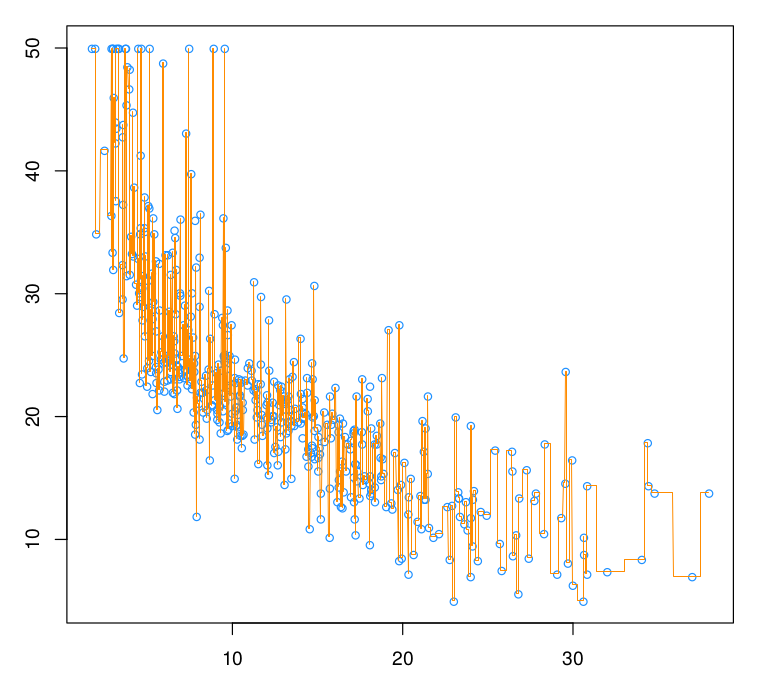
</div>

**Figure 1**

<!-- 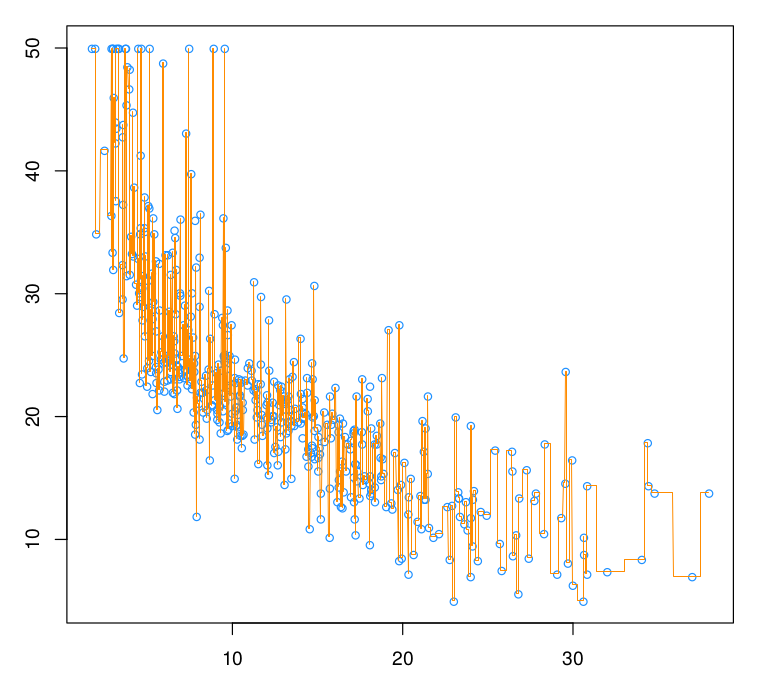 -->

<div>
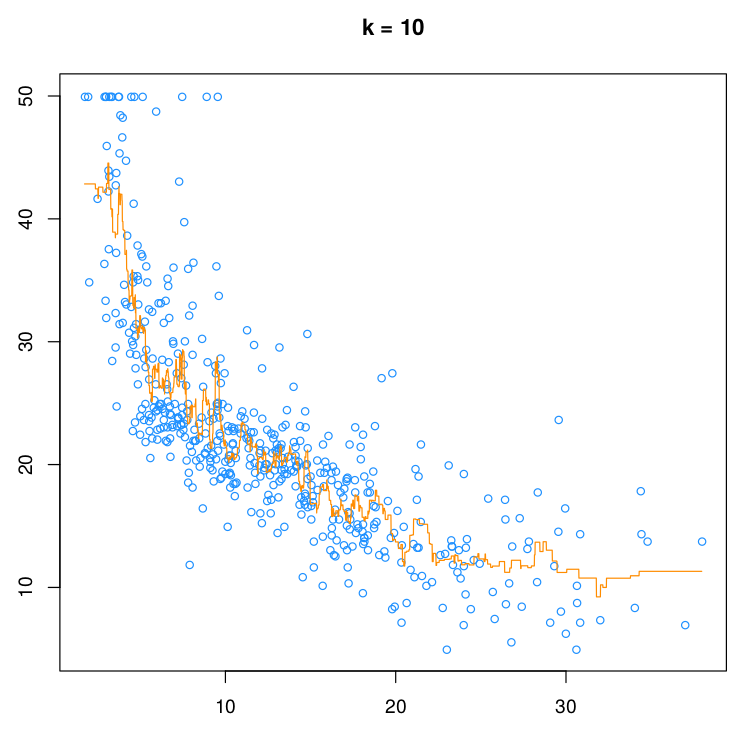
</div>

**Figure 2**
<!-- 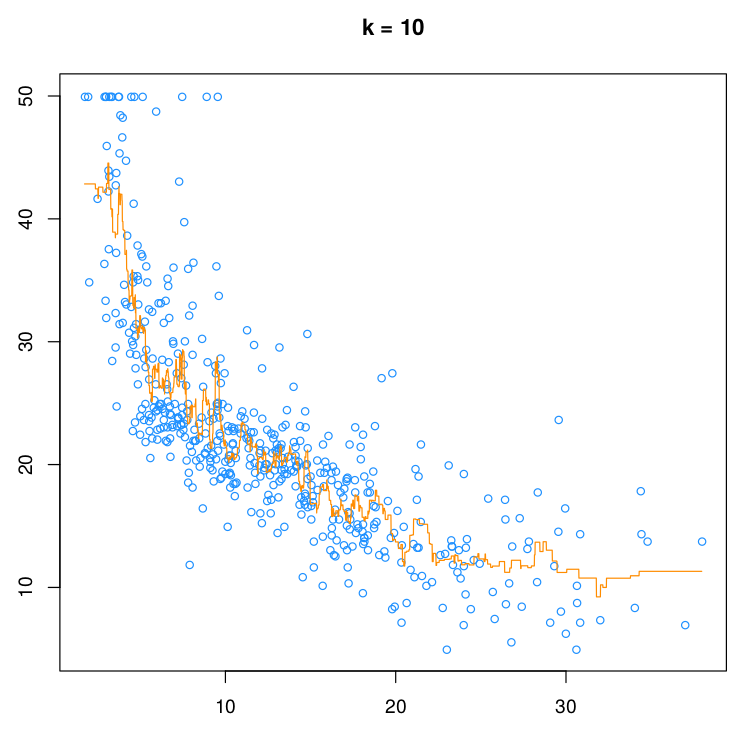 -->

<div>
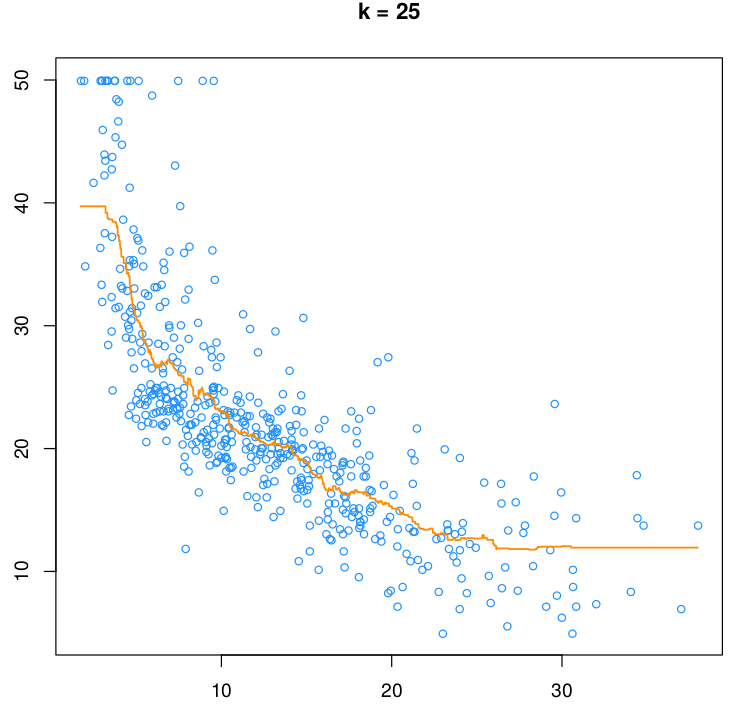
</div>

**Figure 3**
<!-- 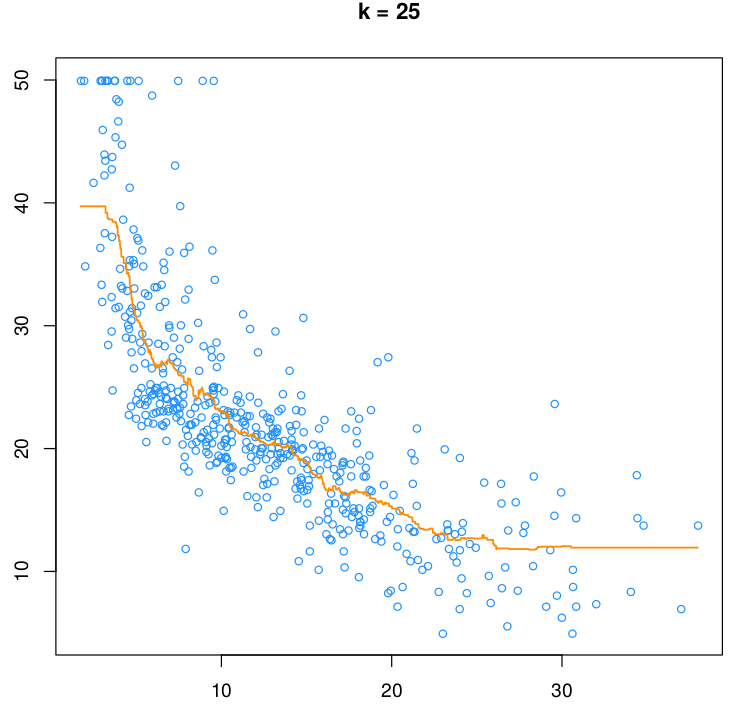 -->

<div>
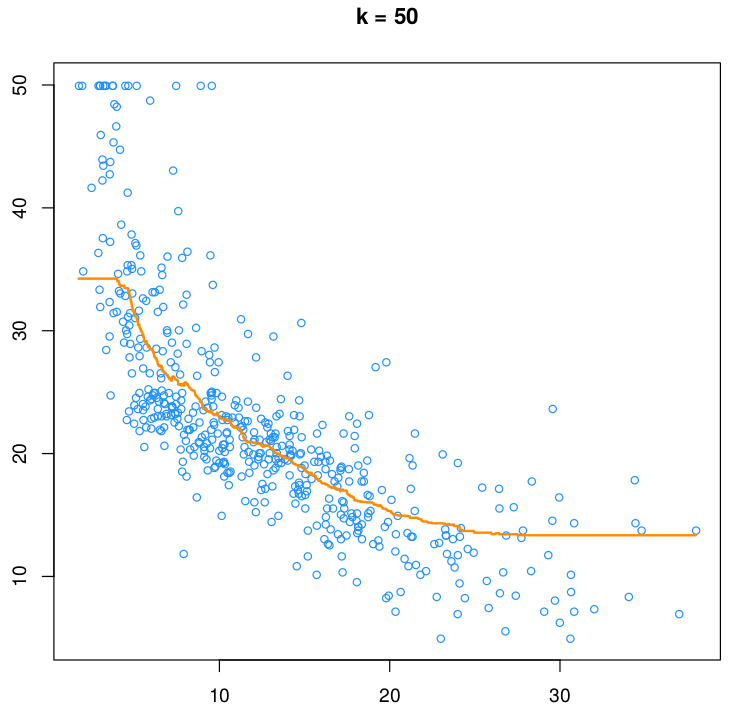
</div>

**Figure 4**
<!-- 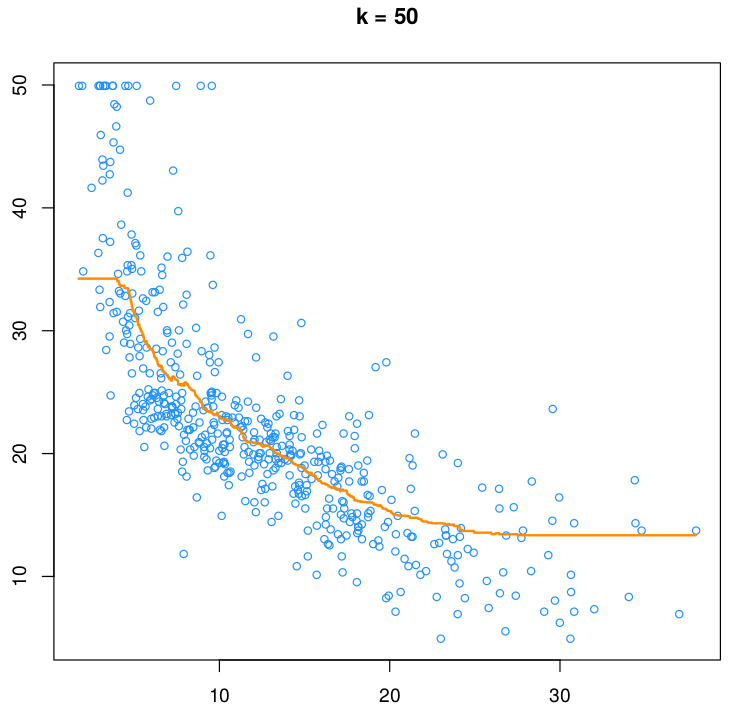 -->

<div>
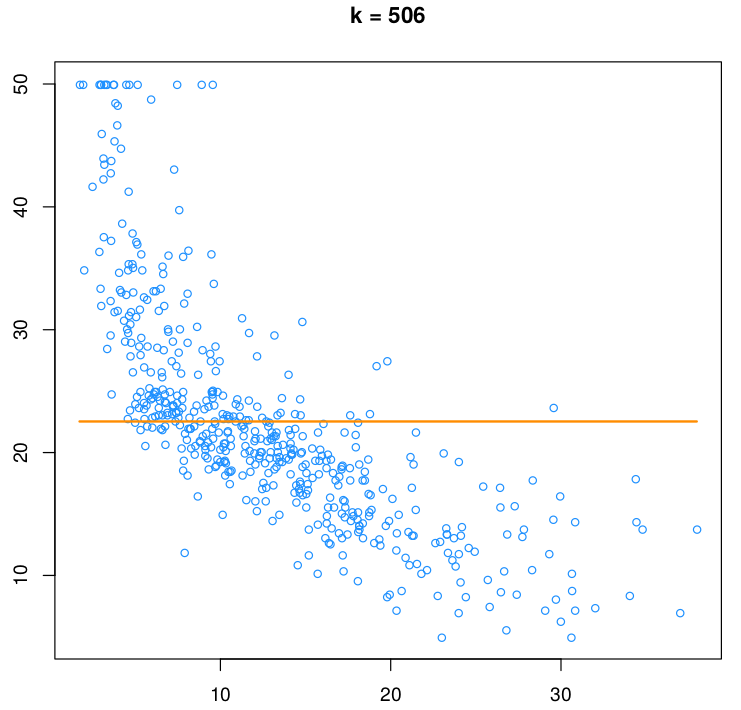
</div>

**Figure 5**

<!-- 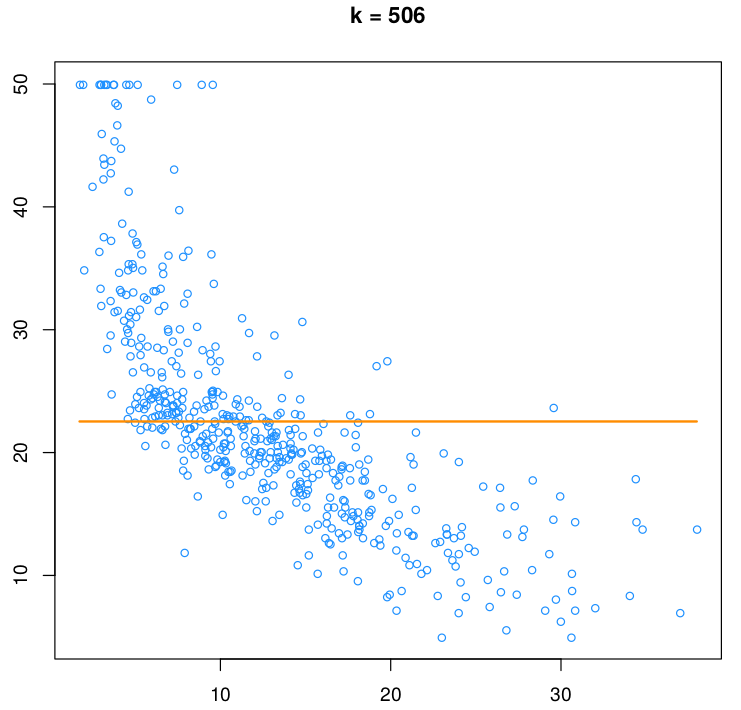 -->

## How does the KNN algorithm work?

We have now seen that the KNN algorithm can be used for both _classification_ and _regression_ problems.
The KNN algorithm uses __feature similarity__ to predict values of new data.
This means the new data is assigned a value based on how closely it resembles the closest $K$ data in the training set. 

The step-by-step instructions for KNN regression is as follows:

0. Pre-process the data. 

The data needs to be *standardized* and split into testing and training sets.

When we say standardized, we mean put onto the same scale.
Otherwise variables with large magnitude (like `Loan` above) will contribute more to distance than variables with small magnitude (like `Age` above).

1. Calculate the distance between the new point and each training point.

There are various methods for calculating the distance between the new data and each training data.
The most common methods are _Euclidean_, _Manhattan_, and _Hamming_.
We will use the Euclidean Distance calculated as the square root of the sum of the squared differences between a new point and an existing point. 

2. The closest $K$ data points are selected based on the calculated distance. 

In general, the KNN model overfits on the training data for a very low value of $K$ and performs poorly on both training and validation sets for a very high value of $K$.
The _elbow curve_ and _grid search techniques_ are methods to help you find the __best__ values for $K$.

3. Average the response of the closest $K$ data points to get the final prediction for the new data. 

## Example: House prices

To start to perform KNN regression, we need data. 
The `boston` dataset was collected in the 1970s and has been used to examine the relationship between clean air and house prices.
It contains 13 variables:


| Variable | Type | Description |
|:----|:-----|:----------|
|crim | Ratio | per capita crime rate by town | 
|zn | Ratio | proportion of residential land zoned for lots over 25,000 sq. ft. | 
|indus | Ratio | proportion of non-retain business acres per town | 
|chas | Nominal (binary) | Charles River dummy variable (=1 if tract bounds river, =0 otherwise) | 
|nox | Ratio | nitrogen oxides concentration (parts per 10 million) | 
|rm | Ratio | average number of rooms per dwelling | 
|age | Ratio | proportion of owner-occupied units built prior to 1940 | 
|dis | Ratio | weighted mean of distances to five Boston employment centers | 
|rad | Ordinal | index of accessibility to radial highways | 
|tax | Ratio | full-value property tax rate per \$10,000 | 
|ptratio | Ratio | pupil-teacher ratio by town | 
|lstat | Ratio | percent lower status of population (defined as non-high school graduate, manual labor) | 
|medv | Ratio | median value of owner-occupied homes in $1000s | 

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>
    
### Load the data

First import `pandas` so we can work with dataframes:

- `import pandas as pd`

In [21]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="/k@:}OLWtAh)hpx[.2^]" x="150" y="308"><field name="libraryName">pandas</field><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe:

- Set `dataframe` to with `pd` do `read_csv` using 
    - `"datasets/boston.csv"`
- `dataframe` (to display)

In [22]:
dataframe = pd.read_csv('datasets/boston.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="$%drMkQ:qhLh-L8dv:ow">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="3" y="114"><field name="VAR" id="$%drMkQ:qhLh-L8dv:ow">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="tN4Jmaffy/={ZFo;uu;W"><field name="TEXT">datasets/boston.csv</field></block></value></block></value></block><block type="variables_get" id="xe,_So|iQl`4_no@5h_m" x="8" y="296"><field name="VAR" id="$%drMkQ:qhLh-L8dv:ow">dataframe</field></block></xml>

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.7   2.94  33.4  
4       18.7   5.33  36.2  
..       ...    ...   ...  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  

[506 rows x 13 columns]

### Visualize the data

Let's look at the relationship between percent of lower status (`lstat`) and the value of a home (`medv`). 

First, import `plotly` for plotting:

- `import plotly.express as px`

In [23]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="x2E1re-+t1/@.:kt|~XV">px</variable></variables><block type="importAs" id="+cd]v=]w[Y{ypm^J_~c}" x="198" y="290"><field name="libraryName">plotly.express</field><field name="VAR" id="x2E1re-+t1/@.:kt|~XV">px</field></block></xml>

Make the scatterplot:

- with `px` do `scatter` using
    - `dataframe`
    - freestyle `x="lstat"`
    - freestyle `y="medv"`

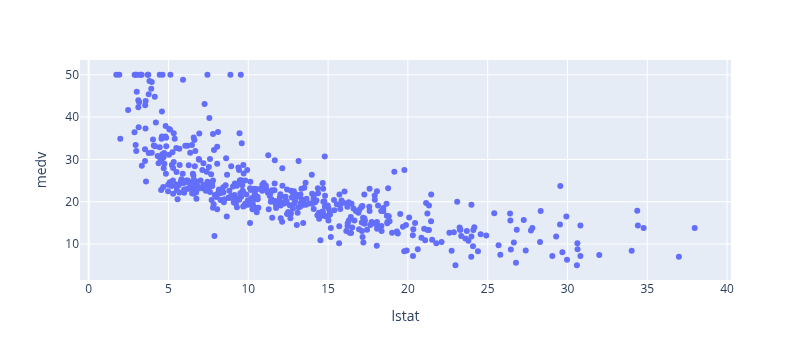

In [24]:
px.scatter(dataframe,x="lstat",y="medv")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="x2E1re-+t1/@.:kt|~XV">px</variable><variable id="$%drMkQ:qhLh-L8dv:ow">dataframe</variable></variables><block type="varDoMethod" id="#{`uqQJ7o((KWM@lD9qM" x="31" y="202"><mutation items="3"></mutation><field name="VAR" id="x2E1re-+t1/@.:kt|~XV">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="%+W1]bM6TMW-dcT(D)!q"><field name="VAR" id="$%drMkQ:qhLh-L8dv:ow">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="_db~Ig?DLuc}U+3QVLY+"><field name="CODE">x="lstat"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="}PsvFr/L@QtObEW4I4*|"><field name="CODE">y="medv"</field></block></value></block></xml>

There appears to be a non-linear relationship between `lstat` and `medv`. 

### Prepare train/test sets

Now, we need to separate the dataset into predictor features and corresponding response (`medv`). 
In other words, split the dataframe into training data and testing data.

Let's start with everything but the response.
We'll use a new function called `drop` to remove `medv`.
This is faster than listing all the columns we want to keep:

- Set `X` to with `dataframe` do `drop` using
    - freestyle `columns=["medv"]`
- `X` (to display)

In [25]:
X = dataframe.drop(columns=["medv"])

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".X4`4]:_GBz1DeII8[o2">X</variable><variable id="$%drMkQ:qhLh-L8dv:ow">dataframe</variable></variables><block type="variables_set" id="j12HEn?u}2$P-S)Ax6d(" x="18" y="151"><field name="VAR" id=".X4`4]:_GBz1DeII8[o2">X</field><value name="VALUE"><block type="varDoMethod" id="PMH^/O2y?rD(Y}r-N6eY"><mutation items="1"></mutation><field name="VAR" id="$%drMkQ:qhLh-L8dv:ow">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="8N-YF(7ms%)oox.~Z;b/"><field name="CODE">columns=["medv"]</field></block></value></block></value></block><block type="variables_get" id="DdFRZt{,QusD6$#{{SUu" x="8" y="296"><field name="VAR" id=".X4`4]:_GBz1DeII8[o2">X</field></block></xml>

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.7   2.94  
4       18.7   5.33  
..       ...    ...  
501     21.0   9.67  
502     21.0   9.08  
503     21.0   5.64  
504     21.0   6.48  
505     21.0   7.88  

[506 rows x 12 columns]

Save a dataframe with just `medv` in `Y`:

- Set `Y` to `dataframe [ ] ` containing the following in a list
    - `"medv"`
- `Y` (to display)

In [26]:
Y = dataframe[['medv']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="fnSh@+0BWBw|hcm3M|WE">Y</variable><variable id="$%drMkQ:qhLh-L8dv:ow">dataframe</variable></variables><block type="variables_set" id="_:J1([xryT4i+F7k{#[%" x="17" y="175"><field name="VAR" id="fnSh@+0BWBw|hcm3M|WE">Y</field><value name="VALUE"><block type="indexer" id="22hOF=T:mHvJrMybHkPs"><field name="VAR" id="$%drMkQ:qhLh-L8dv:ow">dataframe</field><value name="INDEX"><block type="lists_create_with" id="qT2G_{7q~*L;[5j:vtKq"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="=UVLwuCW$1d9ZJ]6HF_,"><field name="TEXT">medv</field></block></value></block></value></block></value></block><block type="variables_get" id="pog__n6Jf{VK_sNEB)B$" x="17" y="239"><field name="VAR" id="fnSh@+0BWBw|hcm3M|WE">Y</field></block></xml>

medv
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]

Next we are going to split our `X` and `Y` into train and test sets. 
That means we'll end up with four data frames: `Xtrain`, `Xtest`, `Ytrain`, `Ytest`.

First, the `sklearn` import for splitting:

- `import sklearn.model_selection as model_selection`

In [27]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now do the splits:

- Set `splits` to with `model_selection` do `train_test_split` using
    - `X` (the features in an array)
    - `Y` (the labels in an array)
    - freestyle `test_size=0.2` (the proportion of the dataset to include in the test split)
    

In [28]:
splits = model_selection.train_test_split(X,Y,test_size=0.2)

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="$%drMkQ:qhLh-L8dv:ow">dataframe</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id=".X4`4]:_GBz1DeII8[o2">X</variable><variable id="fnSh@+0BWBw|hcm3M|WE">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="19" y="206"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><mutation items="3"></mutation><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id=".X4`4]:_GBz1DeII8[o2">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="fnSh@+0BWBw|hcm3M|WE">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block><block type="variables_get" id="LziQaRD`q6IGN=vPaqsj" x="8" y="364"><field name="VAR" id="$%drMkQ:qhLh-L8dv:ow">dataframe</field></block></xml>

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.7   2.94  33.4  
4       18.7   5.33  36.2  
..       ...    ...   ...  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  

[506 rows x 13 columns]

You may have noticed we haven't scaled (standardized) the predictor features yet.
We'll do that next.

### KNN regression model

We need to import libraries for:

- KNN regression
- Mean squared error
- Ravel

As well as libraries we need to standardize:

- Scale
- Pipeline

So do the following imports:

- `import sklearn.neighbors as neighbors`
- `import sklearn.metrics as metrics`
- `import numpy as np`
- `import sklearn.preprocessing as pp`
- `import sklearn.pipeline as pipe`

In [29]:
import sklearn.neighbors as neighbors
import sklearn.metrics as metrics
import numpy as np
import sklearn.preprocessing as pp
import sklearn.pipeline as pipe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="MvUG^P$o3=I*6/67?Rk:">neighbors</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable></variables><block type="importAs" id="Jkis0rqxTm[rs0.yA(O7" x="183" y="249"><field name="libraryName">sklearn.neighbors</field><field name="VAR" id="MvUG^P$o3=I*6/67?Rk:">neighbors</field><next><block type="importAs" id="*G_SVgZ;}hIr,Hi1~$Z6"><field name="libraryName">sklearn.metrics</field><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><next><block type="importAs" id="1ODp#_M`@7Fj/@US}H%#"><field name="libraryName">numpy</field><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><next><block type="importAs" id="/YAkt4vqDQp/.5;pPcY."><field name="libraryName">sklearn.preprocessing</field><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><next><block type="importAs" id="O15G]dI#1oM;`7^r@Pr,"><field name="libraryName">sklearn.pipeline</field><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field></block></next></block></next></block></next></block></next></block></xml>

Before we can train the KNN regression model, we need to scale the data.
To do this easily, we introduce a new concept, **pipelines**.
A pipeline is a series of steps, or stages, that process your data.
You can think of it like an assembly line, with each stage adding something (or taking something away).

The reason we need a pipeline is because when we scale our data, we need to scale not only the training set but also the testing set, and we need to scale them all the same way (so they match).
Pipelines make this easy because we can wrap the scaler and our KNN model in the same pipeline and then forget about it.

Let's make a pipeline with both a scaler and KNN regression:

- Set `std_clf` to with `pipe` do `make_pipeline` using
    - with `pp` create `StandardScaler`
    - with `neighbors` create `KNeighborsRegressor` using
        - freestyle `n_neighbors=10`

In [30]:
std_clf = pipe.make_pipeline(pp.StandardScaler(),neighbors.KNeighborsRegressor(n_neighbors = 10))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="MvUG^P$o3=I*6/67?Rk:">neighbors</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="28" y="96"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><value name="VALUE"><block type="varDoMethod" id="(Noh/e~gvTM3-4|;g]s["><mutation items="2"></mutation><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="ADD0"><block type="varCreateObject" id="e9G_EPu`q{*0`$!~:jh~"><mutation items="1"></mutation><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="ar7keIh-Yv)+b+#Edsp_"><mutation items="1"></mutation><field name="VAR" id="MvUG^P$o3=I*6/67?Rk:">neighbors</field><field name="MEMBER">KNeighborsRegressor</field><data>neighbors:KNeighborsRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="Q!`Pnb+=Gq!aL4Xa}S{z"><field name="CODE">n_neighbors = 10</field></block></value></block></value></block></value></block></xml>

Because our KNN regression model is inside the pipeline, we can go ahead and train it.
In fact, we can treat the whole pipeline like it's a classifier:

-  with `std_clf` do `fit` using
    - `in list splits get # 1` (in menu LISTS)
    - with `np` do `ravel` using
        - `in list splits get # 3` (in menu LISTS)
        
Remember the first and third elements in `splits` are `Xtrain` and `Ytrain`, respectively.

In [31]:
std_clf.fit(splits[0],np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="-34" y="159"><mutation items="2"></mutation><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">fit</field><data>std_clf:fit</data><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><mutation items="1"></mutation><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></xml>

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

The final step is to predict house prices (median value of owner-occupied homes, in $1000s) using the test data:

- Set `predictions` to with `std_clf` do `predict` using
    - `in list splits get # 2` 
- `predictions` (to display)

In [32]:
predictions = std_clf.predict(splits[1])

predictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="5lkT$zi8W,`TXDny?Cv7">predictions</variable><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="-54" y="190"><field name="VAR" id="5lkT$zi8W,`TXDny?Cv7">predictions</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><mutation items="1"></mutation><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">predict</field><data>std_clf:predict</data><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block><block type="variables_get" id="hEVH$Cl8Tw9^=,@Ir([y" x="-52" y="280"><field name="VAR" id="5lkT$zi8W,`TXDny?Cv7">predictions</field></block></xml>

array([22.85, 22.2 , 25.43, 19.97, 20.5 , 17.62, 25.14, 21.19,  9.97,
       14.86, 17.15, 39.75, 18.26, 24.44, 20.52, 30.31, 26.06, 20.45,
       15.48, 23.26, 22.1 , 12.1 , 36.48, 11.85, 23.59, 22.94, 22.44,
       24.89, 19.92, 22.66, 18.64, 17.2 , 30.09, 26.48, 34.79, 30.51,
       22.13, 23.63, 17.86, 14.9 , 38.1 , 19.4 , 19.44, 17.11, 30.67,
       23.8 , 27.24, 22.67, 26.38, 14.22, 25.12, 20.32, 20.71, 17.29,
       38.1 , 20.11, 19.08, 18.86, 28.06, 23.13,  9.49, 28.59, 21.1 ,
       23.77, 21.98, 19.66, 22.79, 18.9 , 37.52, 11.51, 18.26, 17.29,
       16.82, 22.17, 23.33, 16.04, 24.22, 27.02, 14.84, 36.6 , 17.12,
       17.29,  9.58, 14.94, 19.11, 28.71, 10.53, 22.62, 23.5 , 21.92,
       26.  , 23.26, 23.52, 14.24, 17.2 , 23.08, 22.62, 24.4 , 20.36,
       16.21, 15.59, 21.76])

### Assessing the model

Use the `sqrt` of `mean_squared_error` to calculate the root mean squared error (RMSE) between `Ytest` and our predictions:

- `square root` of with `metrics` do `mean_squared_error` using
    - `in list splits get # 4` 
    - `predictions`
    
Remember `square root` lives in the MATH menu.

In [33]:

import math


math.sqrt(metrics.mean_squared_error(splits[3],predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="5lkT$zi8W,`TXDny?Cv7">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="math_single" id="K+~AfTut!=kX_{{*?zjq" x="-102" y="160"><field name="OP">ROOT</field><value name="NUM"><block type="varDoMethod" id="dtb+F,1WedaH`AXMNxY["><mutation items="2"></mutation><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">mean_squared_error</field><data>metrics:mean_squared_error</data><value name="ADD0"><block type="lists_getIndex" id="%Q5nelLnQN_U[o);kAqv"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="eCZagv7%IlQ;!+X*/wn7"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="+UoB2X],lB*~xVCJOMRM"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="Y`5[z@^QpYeXO!b/zuki"><field name="VAR" id="5lkT$zi8W,`TXDny?Cv7">predictions</field></block></value></block></value></block></xml>

4.221031608876823

If you have the time, try taking the scaler stage out of the pipeline, train the model, and assess it.
You should find that your RMSE about doubled without the scaling.

### Finding the optimal K

In figures 1-5 above, we saw how different values of K affect the shape of the line in KNN regression.
Both small values of K and large values of K don't seem very good.
Instead we want a K that is "just right," somewhere in the middle.

One way to find the optimal K is to train models for a range of K values, say 1 to 100.
It would take you a long time to do this, even copy/pasting the code above!

To make this kind of task doable, we're going to introduce a basic programming concept called a loop (see the LOOPS menu).
But don't be fooled, even though loops are basic, they are one of the hardest things to understand in programming.

The basic idea of a loop is that you create a template of the thing you want to do many times, and you put that template inside the loop.
Then you have a few values that change depending on the *iteration* of the loop.

Let's look a simple example, a loop that prints the numbers 1 to 3:

- Get the **green** `for each item i in list` block
- To its right, attach a list containing 1, 2, and 3
- Inside the loop block, put `print i`

In [34]:
for i in [1, 2, 3]:
  print(i)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="eV4EZ~~D[TKTsoJ=Y9i/">i</variable></variables><block type="controls_forEach" id="FQ8X,Yn$Q`D}l2yQmxgn" x="99" y="276"><field name="VAR" id="eV4EZ~~D[TKTsoJ=Y9i/">i</field><value name="LIST"><block type="lists_create_with" id="gJi:5JuudMItfG.a90l7"><mutation items="3"></mutation><value name="ADD0"><block type="math_number" id="x%u{x?:sZy@{o?3py;AZ"><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id="8uQpfZhd]$_:!+h{X+gX"><field name="NUM">2</field></block></value><value name="ADD2"><block type="math_number" id="Y@I~L`X)g,BYB$-Yk;i_"><field name="NUM">3</field></block></value></block></value><statement name="DO"><block type="text_print" id="GOAMMS}Lq-d0X-vGEKQn"><value name="TEXT"><shadow type="text" id="$wPTCb2SBOUHe@SW]e-A"><field name="TEXT">abc</field></shadow><block type="variables_get" id="$;paAJN}M27hOi7BpPVE"><field name="VAR" id="eV4EZ~~D[TKTsoJ=Y9i/">i</field></block></value></block></statement></block></xml>

1
2
3


In this example:

- `print i` is our template
- `i` changes at each iteration of the loop to the next thing in the list

Next, we're going to follow the same logic, but instead of just printing inside the loop, we will build a KNN regression and print out its RMSE.

<!-- First, the imports:

- `import plotly.graph_objects as go` -->

Here are the steps (use blocks to code after each step to save your work):

- Get the **green** `for each item j in list` block and attach a list containing 1, 10, 25, 50, 100, and 250
- Copy the entire `std_clf` block (that makes the pipeline) and put it inside the loop
- Change the freestyle `n_neighbors = 10` to `n_neighbors = j`
- Copy the entire `std_clf.fit` block (that trains the pipeline) attach a freestyle to the front of it (see below) and put it in the loop (this adapter block lets you but `std_clf.fit` in the loop block)

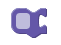
- Copy the entire `predictions` block (that does the prediction) and put it inside the loop
- Create a variable `rmse` and set it to the entire `square root` block and put it inside the loop
- Inside the loop do `print` `create text with`
    - `j`
    - `":"`
    - `rmse`
    
**In each of the above steps, when you put something in the loop, it goes below the block from the previous step**

In [35]:

import math


for j in [1, 10, 25, 50, 100, 250]:
  std_clf = pipe.make_pipeline(pp.StandardScaler(),neighbors.KNeighborsRegressor(n_neighbors = j))
  (std_clf.fit(splits[0],np.ravel(splits[2])))
  predictions = std_clf.predict(splits[1])
  rmse = math.sqrt(metrics.mean_squared_error(splits[3],predictions))
  print(''.join([str(x) for x in [j, ':', rmse]]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="nr%W_%EA(*n$_f,PuH#c">j</variable><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="MvUG^P$o3=I*6/67?Rk:">neighbors</variable><variable id="5lkT$zi8W,`TXDny?Cv7">predictions</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="RN+myW;vx){}Q0LuFA9y">rmse</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable></variables><block type="controls_forEach" id="MbWYZ/u3Q#+3*u`TM}ce" x="-33" y="25"><field name="VAR" id="nr%W_%EA(*n$_f,PuH#c">j</field><value name="LIST"><block type="lists_create_with" id="Q6_EXa41T:y(.uy[pm.V"><mutation items="6"></mutation><value name="ADD0"><block type="math_number" id="+BJ@yT0IgJORgO^/))c~"><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id=".~r[qy7$p-Jy_g:ACHYr"><field name="NUM">10</field></block></value><value name="ADD2"><block type="math_number" id="w!m`o}C;PB7OhYP5ZTq~"><field name="NUM">25</field></block></value><value name="ADD3"><block type="math_number" id="?!EK)M.j{u~@|;ytL|nd"><field name="NUM">50</field></block></value><value name="ADD4"><block type="math_number" id="cLtaU]#w-;S(sUq8pw/l"><field name="NUM">100</field></block></value><value name="ADD5"><block type="math_number" id="910qY[[4~4nziBPT;K+G"><field name="NUM">250</field></block></value></block></value><statement name="DO"><block type="variables_set" id="8APEX{xGs3Qz/$NzTFrY"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><value name="VALUE"><block type="varDoMethod" id="W=ep`rJjDXvsAV^R+NIG"><mutation items="2"></mutation><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="ADD0"><block type="varCreateObject" id="ME+Z@t~BnN}LL22r%Hxt"><mutation items="1"></mutation><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="p=kmgsx6gSLD(RSPi]We"><mutation items="1"></mutation><field name="VAR" id="MvUG^P$o3=I*6/67?Rk:">neighbors</field><field name="MEMBER">KNeighborsRegressor</field><data>neighbors:KNeighborsRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="4*MO9`pDvGbjv^%|]#Jm"><field name="CODE">n_neighbors = j</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="b2$eeB}vA+APG9EY4RvG"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="!a#R5q~=+4G.fWQ-a:Ai"><mutation items="2"></mutation><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">fit</field><data>std_clf:fit</data><value name="ADD0"><block type="lists_getIndex" id="Bg)U?tUT/i!BuqI+~78i"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="J0_:T[7!I[/pre=^gqIw"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Jt|3]Id8E7gD7O}{bmrW"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="7!WF{br/dCPJd;YQ:(Ik"><mutation items="1"></mutation><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="p9_vm4JY1L*#.U$2H~(3"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Ix.0Sy(FQ_=FtQZ`E7YO"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="R!St?-]QDZB.6:gA5w9["><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="variables_set" id="}aopG5Di|aBV}PCsFRt|"><field name="VAR" id="5lkT$zi8W,`TXDny?Cv7">predictions</field><value name="VALUE"><block type="varDoMethod" id="{!ML%F.iI.(gk.yKaKAo"><mutation items="1"></mutation><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">predict</field><data>std_clf:predict</data><value name="ADD0"><block type="lists_getIndex" id="NnMds!lCkgRZMy3GES4A"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="u{3q7m[%l/#e^qWs(A+$"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="J=#ZnMxhAvm4we#*n[1u"><field name="NUM">2</field></block></value></block></value></block></value><next><block type="variables_set" id="]Ea4cP;)eg*?FYSg,Hut"><field name="VAR" id="RN+myW;vx){}Q0LuFA9y">rmse</field><value name="VALUE"><block type="math_single" id="Zj7qwunxC88s#@FHZp;o"><field name="OP">ROOT</field><value name="NUM"><block type="varDoMethod" id="7qLvGJ/o$}+](kkcy*!s"><mutation items="2"></mutation><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">mean_squared_error</field><data>metrics:mean_squared_error</data><value name="ADD0"><block type="lists_getIndex" id="~=g?~X5=@%yq(ykF,@vT"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="p^5+}-qjm4#-sUjITW:U"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="p+QpL(p9Fvb81#)=M#AO"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="JlQHE,X|BqgbRt62iHR}"><field name="VAR" id="5lkT$zi8W,`TXDny?Cv7">predictions</field></block></value></block></value></block></value><next><block type="text_print" id="vG7/v1s~ddKS,]{?){9j"><value name="TEXT"><shadow type="text" id="m]M`(:U/i~j@n/SHk!aE"><field name="TEXT">abc</field></shadow><block type="text_join" id=";i@2WV=j)URh;Nq30iJE"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="79Ugt/dg#lCaHOD+ufw="><field name="VAR" id="nr%W_%EA(*n$_f,PuH#c">j</field></block></value><value name="ADD1"><block type="text" id="2fUR/Sw-q*p=QW,%x7!;"><field name="TEXT">:</field></block></value><value name="ADD2"><block type="variables_get" id="Hz-2Ry[Go)mlv?{#UdM6"><field name="VAR" id="RN+myW;vx){}Q0LuFA9y">rmse</field></block></value></block></value></block></next></block></next></block></next></block></next></block></statement></block></xml>

1:3.6501947302339164
10:4.221031608876823
25:4.771913678689374
50:5.600732284054209
100:6.489700576947396
250:7.2604440389244065


The optimal K (in terms of rmse) is 10 for me, but may be different for you depending on your data split.
This is an example of what is sometimes called an *elbow*: errors start and end high, but have a distinct minimum somewhere in between.

### Plotting the data and the model predictions

Previously we used a scatterplot to examine the relationship between percent of lower status (`lstat`) and the value of a home (`medv`). 
Although our model uses many other predictors, we can only easily plot one of them (e.g. `lstat`) against `medv` at a time, because scatterplots are 2D.

However, we can still plot our predictions, which are based on all predictor features, on the same 2D plot.
This allows us to look at the model's fit, at least with respect to the one dimension of `lstat`.

To do this, we need to import a more sophisticated part of `plotly` called `graph_objects`:

- `import plotly.graph_objects as go`

In [36]:
import plotly.graph_objects as go

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`iml3^SQ8#}M{aSRdsjz">go</variable></variables><block type="importAs" id="I=D{X(f@]J?iDq8EKrNP" x="65" y="163"><field name="libraryName">plotly.graph_objects</field><field name="VAR" id="`iml3^SQ8#}M{aSRdsjz">go</field></block></xml>

The way `go` works is that we first create an *empty* figure, then we add data to it in layers.
This is in contrast to `px`, where we created the figure and added data all at once.

To create the empty figure:

- Set `fig` to with `go` create `Figure`

In [37]:
fig = go.Figure()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@U5l^JIp,}.H=ECCW?@g">fig</variable><variable id="`iml3^SQ8#}M{aSRdsjz">go</variable></variables><block type="variables_set" id="jhv+dBJpS#?]Xz;mB/y}" x="63" y="341"><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><value name="VALUE"><block type="varCreateObject" id="U[~m;7}PfW266d{R4B_w"><mutation items="1"></mutation><field name="VAR" id="`iml3^SQ8#}M{aSRdsjz">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value></block></xml>

Now we need to add two kinds of data to `fig`:

- The test data (both `Xtest` and `Ytest` from `split`
- The predictions (both `Xtest` and `predictions`

Each of these can be done with the function `add_trace`.
However, notice the both times we need just a column from `Xtest`, not the whole thing.
So we need to get the `lstat` column on its own first.

Here are the steps:

**Getting `lstat` out of `splits`**
- Set `Xtest` to `in list splits get # 2`
- Set `lstat` to `Xtest [` a list containing `"lstat"` `]`

In [38]:
Xtest = splits[1]
lstat = Xtest[['lstat']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="fe.98]:,bU@x*=}zaJ1/">Xtest</variable><variable id="rVUZld`HfW,n/PC{X!9-">lstat</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="Q=9pQHE7F@.Gw^K.L-dt" x="11" y="385"><field name="VAR" id="fe.98]:,bU@x*=}zaJ1/">Xtest</field><value name="VALUE"><block type="lists_getIndex" id="57k*lJ0;vmKpSg*!H`]8"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="F4hyTfPiqx9)S?z+xUIq"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="|irh~@jIqN~E)ZBhA5j/"><field name="NUM">2</field></block></value></block></value><next><block type="variables_set" id="%B!g^jAyg[JC}a?Gd;]2"><field name="VAR" id="rVUZld`HfW,n/PC{X!9-">lstat</field><value name="VALUE"><block type="indexer" id="L]ClG49hl?`v1EmAZY)h"><field name="VAR" id="fe.98]:,bU@x*=}zaJ1/">Xtest</field><value name="INDEX"><block type="lists_create_with" id=",YhZdkj[DdlL=cwFv4FA"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="opa@$sxEyy6xpto~juJ:"><field name="TEXT">lstat</field></block></value></block></value></block></value></block></next></block></xml>

**Adding scatterplot of observed data**
- with `fig` do `add_scatter` using
    - freestyle `x=` with `np` do `ravel` using 
        - `lstat`  (see image below for this freestyle)
    - freestyle `y=` with `np` do `ravel` using
        - `in list splits get # 4` 
    - freestyle `mode="markers"`
    - freestyle `name="observed"`
    - freestyle `line=dict(color='royalblue')`
        
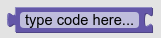

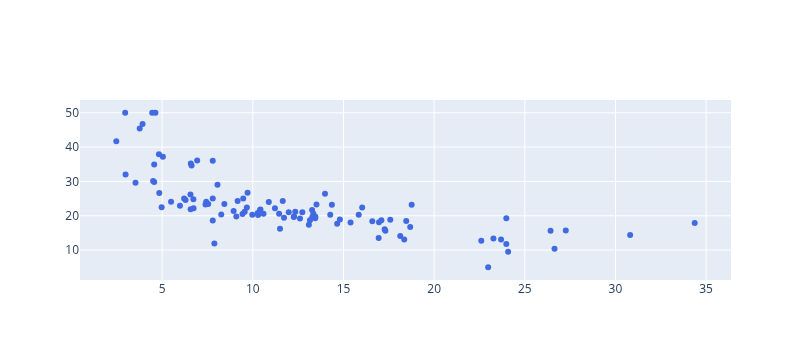

In [39]:
fig.add_scatter(x= (np.ravel(lstat)),y= (np.ravel(splits[3])),mode="markers",name="observed",line=dict(color='royalblue'))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@U5l^JIp,}.H=ECCW?@g">fig</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="rVUZld`HfW,n/PC{X!9-">lstat</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="qZ|Z9.ijg3CRAUbY+PrR" x="86" y="199"><mutation items="5"></mutation><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="ADD0"><block type="valueOutputCodeBlock" id="RTv-p{TaUq@4_58RZB%1"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod" id="j8@mjp~f?I7StnE+y$s,"><mutation items="1"></mutation><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="variables_get" id="AMp#2-apaCBpWlKv]`Ce"><field name="VAR" id="rVUZld`HfW,n/PC{X!9-">lstat</field></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="6m0G+-^kfR]Eenvpo/EG"><field name="CODE">y=</field><value name="INPUT"><block type="varDoMethod" id="zhmXZDw$a:+3N3Ku8QiP"><mutation items="1"></mutation><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="5qTOTBSLB=NE^C6_*08?"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="?wwsU(;W7Ij?5fbx}|^2"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="+9|,kf=1_:].xRpoB|%Y"><field name="NUM">4</field></block></value></block></value></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Ht-!;BCPTD4b$ZLafodk"><field name="CODE">mode="markers"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="0uhd2Bmdznda(paBhnX*"><field name="CODE">name="observed" </field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="wfU8.|6m-r/a+Kct/[I["><field name="CODE">line=dict(color='royalblue')</field></block></value></block></xml>

**Adding scatterplot of predictions**
- with `fig` do `add_scatter` using
    - freestyle `x=` with `np` do `ravel` using 
        - `lstat`
    - freestyle `y=` with `np` do `ravel` using 
        - `predictions`
    - freestyle `mode=markers`
    - freestyle `name=predicted`
    - line=dict(color='orange')        

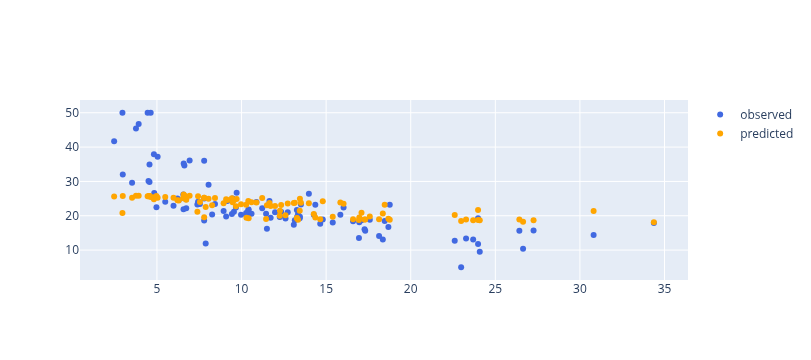

In [40]:
fig.add_scatter(x= (np.ravel(lstat)),y= (np.ravel(predictions)),mode="markers",name="predicted",line=dict(color='orange'))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@U5l^JIp,}.H=ECCW?@g">fig</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="rVUZld`HfW,n/PC{X!9-">lstat</variable><variable id="5lkT$zi8W,`TXDny?Cv7">predictions</variable></variables><block type="varDoMethod" id="qZ|Z9.ijg3CRAUbY+PrR" x="86" y="199"><mutation items="5"></mutation><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="ADD0"><block type="valueOutputCodeBlock" id="RTv-p{TaUq@4_58RZB%1"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod" id="j8@mjp~f?I7StnE+y$s,"><mutation items="1"></mutation><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="variables_get" id="AMp#2-apaCBpWlKv]`Ce"><field name="VAR" id="rVUZld`HfW,n/PC{X!9-">lstat</field></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="6m0G+-^kfR]Eenvpo/EG"><field name="CODE">y=</field><value name="INPUT"><block type="varDoMethod" id="zhmXZDw$a:+3N3Ku8QiP"><mutation items="1"></mutation><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="variables_get" id="(nLCjxyyxgfW6OyGwn"><field name="VAR" id="5lkT$zi8W,`TXDny?Cv7">predictions</field></block></value></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Ht-!;BCPTD4b$ZLafodk"><field name="CODE">mode="markers"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="0uhd2Bmdznda(paBhnX*"><field name="CODE">name="predicted" </field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="wfU8.|6m-r/a+Kct/[I["><field name="CODE">line=dict(color='orange')</field></block></value></block></xml>

It's always a good idea to look closely at your model predictions!

In this plot, we see that although our RMSE is lowest at K=10, there are some ranges of our predictor features where the model is doing better than others.

Looking at this plot for `lstat`, it seems that when `lstat` is below 10% and above 20%, the model isn't doing as well as we'd like.

It just so happens that most of the data is between 10 and 20%, so our overall model fit scores are pretty good even though we're having problems with some ranges of the data.

## Strengths and Weaknesses

Unlike other types of models which only work for linear relationships, KNN regression can be used to model non-linear relationships.
KNN models are also easy to implement and fitting the model tends to be fast.
However, the model is slower to predict since to predict an outcome for a new value, the algorithm needs to search through all the points in the training set to find the nearest ones.
This can take awhile for large datasets.

Due to its non-parametric nature, KNN regression models are not directly interpretable like some other models are.
This makes it difficult to determine which features have the greatest effect on the response.
For this reason KNN regression is not useful in _feature selection_, a technique used to weed out features that are less important thereby reducing the dimensionality of the data.

## Check your understanding

**Hover to see the correct answer.**

1.  What is the primary purpose of K-Nearest Neighbor (KNN) regression?
- To uncover latent patterns in data.
- <div title="Correct answer">To predict a numeric value.</div>
- To classify data into distinct categories.
- To determine the probability distribution of data.

2.  Which of the following best describes KNN regression?
- A parametric regression method that assumes a normal distribution.
- A linear regression method suitable for normally distributed response variables.
- <div title="Correct answer">A non-parametric regression method that does not assume a particular probability distribution.</div>
- A classification method for predicting categorical labels.

3.  In KNN regression, how is the numeric value of a new data point predicted?
- As the sum of the squared distances to its K nearest neighbors.
- As the median of the response values of its K nearest neighbors.
- As the weighted sum of the response values of its K nearest neighbors.
- <div title="Correct answer">As the average of the response values of its K nearest neighbors.</div>

4.  What is the Euclidean distance formula used to calculate the distance between a new data point (Age, Loan) and a training point (Training Age, Training Loan)?
- $Distance = |(\text{Age} - \text{Training Age}) + (\text{Loan} - \text{Training Loan})|$
- $Distance = (\text{Age} - \text{Training Age})^2 + (\text{Loan} - \text{Training Loan})^2$
- <div title="Correct answer">$Distance = \sqrt{(\text{Age} - \text{Training Age})^2 + (\text{Loan} - \text{Training Loan})^2}$</div>
- $Distance = \sqrt{|\text{Age} - \text{Training Age}| + |\text{Loan} - \text{Training Loan}|}$

5.  If, for a given prediction with K=3, the HPI values of the 3 nearest neighbors are 244, 198, and 138, what is the predicted HPI?
- 180
- 190
- <div title="Correct answer">193.33</div>
- 200

6.  How is the `Residual` in KNN regression calculated?
- <div title="Correct answer">Observed HPI minus Predicted HPI</div>
- Absolute difference between Observed HPI and Predicted HPI
- Square of the difference between Observed HPI and Predicted HPI

7.  What does a smaller Root Mean Square Error (RMSE) indicate in KNN regression?
- A more complex model.
- A higher degree of overfitting.
- <div title="Correct answer">A better model fit.</div>
- A larger variance in predictions.

8.  Why is standardization important in KNN regression, especially when variables have different magnitudes?
- To increase the computational efficiency of the algorithm.
- To make the model directly interpretable.
- <div title="Correct answer">To prevent variables with larger magnitudes from disproportionately influencing the distance calculation.</div>
- To reduce the number of features in the dataset.

9.  What is the formula for standardizing a variable $X_i$?
- $Z_i = (X_i + \bar{X}) / S$
- $Z_i = (X_i - S) / \bar{X}$
- <div title="Correct answer">$Z_i = (X_i - \bar{X}) / S$</div>
- $Z_i = X_i / (\bar{X} \cdot S)$

10. What effect does a very low value of $K$ typically have on a KNN regression fit?
- It makes the regression fit smoother.
- It leads to less accurate but less variable predictions.
- <div title="Correct answer">It makes the regression fit very choppy and prone to overfitting.</div>
- It results in a horizontal prediction line.

11. According to the document, what happens to the KNN regression prediction line as $K$ increases towards $n$ (the total number of observations)?
- It becomes more choppy.
- It becomes more accurate.
- <div title="Correct answer">It becomes completely smooth and horizontal.</div>
- It starts to overfit the training data.

12. What are the three common methods mentioned for calculating the distance between data points in KNN?
- Linear, Polynomial, and Exponential
- Mean, Median, and Mode
- <div title="Correct answer">Euclidean, Manhattan, and Hamming</div>
- Correlation, Covariance, and Regression

13. In the provided Python code, what is the purpose of `dataframe.drop(columns=["medv"])`?
- To remove rows with missing `medv` values.
- To create a new DataFrame `X` containing only the `medv` column.
- <div title="Correct answer">To create a new DataFrame `X` containing all columns except `medv`, which is the response variable.</div>
- To display the `medv` column in the console.

14. What does `sklearn.model_selection.train_test_split(X, Y, test_size=0.2)` achieve?
- It trains the KNN model with 20% of the data.
- It tests the KNN model with 80% of the data.
- <div title="Correct answer">It splits the `X` (features) and `Y` (labels) data into training and testing sets, with 20% of the data allocated for testing.</div>
- It randomly shuffles the data without splitting it.

15. What is the primary reason for using a `pipeline` in the KNN regression example?
- To visualize the data more effectively.
- To manually scale the training and testing sets separately.
- <div title="Correct answer">To easily apply a scaler and the KNN model sequentially, ensuring consistent scaling for both training and testing data.</div>
- To perform feature selection on the dataset.

16. In the loop to find the optimal K, what does `rmse = math.sqrt(metrics.mean_squared_error(splits[3],predictions))` calculate?
- The mean absolute error for the current K.
- The sum of squared residuals for the current K.
- <div title="Correct answer">The root mean squared error between the actual test values (`splits[3]`) and the predicted values for the current K.</div>
- The R-squared value for the model.

17. Based on the "Plotting the data and the model predictions" section, why is it stated that the model isn't doing as well when `lstat` is below 10% and above 20%?
- Because these ranges have a higher density of data points.
- Because the RMSE is specifically calculated for these ranges.
- <div title="Correct answer">Because visual inspection of the plot suggests the model's predictions deviate more from the observed values in these `lstat` ranges.</div>
- Because the model is designed to perform optimally only within the 10-20% `lstat` range.

18. Which of the following is a strength of KNN regression?
- It is directly interpretable for feature selection.
- It is very fast to predict outcomes for large datasets.
- It assumes a linear relationship between predictors and response.
- <div title="Correct answer">It can be used to model non-linear relationships.</div>

19. Which of the following is a weakness of KNN regression?
- It is difficult to implement.
- It requires a normal distribution of the response variable.
- <div title="Correct answer">It is slower to predict for new values on large datasets because it needs to search through all training points.</div>
- It can only be used for classification problems.

<!--  -->